In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from torch.utils.data import DataLoader
from models.dataset import LCDataset

In [2]:
data = pd.read_pickle('data/backup_data.pkl')
data.head()

,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,loan_status_num
Loan ID,,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0
77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0
89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,1
273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,0
8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0,0


In [253]:
data['loan_status_num'].sum()
66242-16214

50028

In [3]:
data.drop(['Loan Status', 'Customer ID'], axis=1, inplace=True)

In [4]:
print([column for column in data.columns if data[column].dtype == object])

['Term', 'Home Ownership', 'Purpose']


In [5]:
dummies = ['Term', 'Home Ownership', 'Purpose']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [6]:
data.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Loan ID,,,,,,,,,,,,,,,,,,,,,
14dd8831-6af5-400b-83ec-68e61888a048,445412.0,709.0,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,...,0,0,0,0,0,0,0,0,0,0
77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,347666.0,721.0,806949.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89d8cb0c-e5c2-4f54-b056-48a645c543dd,206602.0,7290.0,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,...,0,0,0,0,0,0,0,0,0,0
273581de-85d8-4332-81a5-19b04ce68666,217646.0,730.0,1184194.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8af915d9-9e91-44a0-b5a2-564a45c12089,548746.0,678.0,2559110.0,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Preparing data for the models

In [7]:
X = data.drop(columns=['loan_status_num'])
y = data['loan_status_num']
X_alt = data.drop(columns=['loan_status_num'])
X_alt_train, X_alt_temp, y_alt_train, y_alt_temp = train_test_split(X_alt, y, test_size=0.3, random_state=42)
X_train_extra, X_test_extra, y_train_extra, y_test_extra = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

In [8]:
# Split data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation (10%) and temp2 (20%)
X_validation, X_temp2, y_validation, y_temp2 = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Split temp2 into calibration (10%) and test (10%)
X_calibration, X_test, y_calibration, y_test = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)
X_calibration_scaled = scaler.transform(X_calibration)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_validation_tensor = torch.tensor(X_validation_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
X_calibration_tensor = torch.tensor(X_calibration_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(len(y_train),1)
y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.float32).reshape(len(y_validation),1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(len(y_test),1)
y_calibration_tensor = torch.tensor(y_calibration.values, dtype=torch.float32).reshape(len(y_calibration),1)

In [93]:
from sklearn.tree import DecisionTreeClassifier, export_text
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
# Fit the model using X_train and y_train
dt_model.fit(X_train_extra, y_train_extra)
# Get the rules of the decision tree
tree_rules = export_text(dt_model, feature_names=list(X_train_extra.columns))
print(tree_rules)
# Use the trained model to make predictions
predictions_extra = dt_model.predict(X_test_extra)

class_report = classification_report(y_test_extra, predictions_extra)
print("Classification Report:\n", class_report)


|--- Credit Score <= 3300.50
|   |--- Term_Short Term <= 0.50
|   |   |--- Annual Income <= 1405107.00
|   |   |   |--- class: 1
|   |   |--- Annual Income >  1405107.00
|   |   |   |--- class: 0
|   |--- Term_Short Term >  0.50
|   |   |--- Credit Score <= 745.50
|   |   |   |--- class: 0
|   |   |--- Credit Score >  745.50
|   |   |   |--- class: 0
|--- Credit Score >  3300.50
|   |--- class: 1

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84     14976
           1       0.50      0.44      0.47      4897

    accuracy                           0.75     19873
   macro avg       0.66      0.65      0.65     19873
weighted avg       0.74      0.75      0.75     19873


In [80]:
classlabels = torch.tensor(data['loan_status_num'].values, dtype=torch.long)
class_counts = torch.bincount(classlabels)

# Compute inverse class frequencies
class_weights_original = 1.0 / class_counts.float()

# Normalize class weights
class_weights_original /= class_weights_original.sum()
class_weights = class_weights_original[y_train_tensor.long()]


In [14]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();


# Logistic Regression

In [15]:
from models.model import Logistic_Regression, MLP
from torchinfo import summary

In [16]:
#calculating number of features
n_features=len(data.drop(columns=['loan_status_num']).columns)
n_features

30

In [17]:
lr_model = Logistic_Regression(num_features=n_features)
summary(lr_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Logistic_Regression                      [46369, 1]                --
├─Sequential: 1-1                        [46369, 1]                --
│    └─Linear: 2-1                       [46369, 1]                31
│    └─Sigmoid: 2-2                      [46369, 1]                --
Total params: 31
Trainable params: 31
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.44
Input size (MB): 5.56
Forward/backward pass size (MB): 0.37
Params size (MB): 0.00
Estimated Total Size (MB): 5.94

In [18]:
LEARNING_RATE = 0.01
EPOCHS = 1000

In [19]:
loss_function = nn.BCELoss(weight=class_weights)

In [20]:
optimizer = optim.Adam(lr_model.parameters(), lr=LEARNING_RATE)

In [21]:
def calculate_accuracy(preds, actuals):

    with torch.no_grad():
        rounded_preds = torch.round(preds)
        num_correct = torch.sum(rounded_preds == actuals)
        accuracy = num_correct/len(preds)

    return accuracy

In [22]:
train_losses = []
#test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = lr_model(X_train_tensor)
    train_loss  = loss_function(train_preds, y_train_tensor)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = lr_model(X_validation_tensor)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, y_train_tensor)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer.step()

    # Store training history #f
    train_losses.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
                  #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.274 	| Train acc: 0.45 	| Test acc: 0.46
Epoch: 100 	| Train loss: 0.217 	| Train acc: 0.74 	| Test acc: 0.74
Epoch: 200 	| Train loss: 0.215 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 300 	| Train loss: 0.214 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 400 	| Train loss: 0.214 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 500 	| Train loss: 0.214 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 600 	| Train loss: 0.214 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 700 	| Train loss: 0.213 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 800 	| Train loss: 0.213 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 900 	| Train loss: 0.213 	| Train acc: 0.75 	| Test acc: 0.75


In [23]:
evaluate_nn(y_train_tensor.clone().detach(), train_preds.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 74.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.827247      0.485347  0.749251      0.656297      0.743802
recall         0.844688      0.453654  0.749251      0.649171      0.749251
f1-score       0.835877      0.468966  0.749251      0.652421      0.746327
support    35052.000000  11317.000000  0.749251  46369.000000  46369.000000
_______________________________________________
Confusion Matrix: 
 [[29608  5444]
 [ 6183  5134]]

Test Result:
Accuracy Score: 74.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.823926     0.494367  0.748094     0.659146      0.741762
recall        0.845013     0.456269  0.748094     0.650641      0.748094
f1-score      0.834336     0.474555  0.748094     0.654445      0.744638
support    49

In [24]:
test_preds_lr = lr_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_lr.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 75.77%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.832005     0.505611  0.757735     0.668808      0.752097
recall        0.851034     0.469939  0.757735     0.660486      0.757735
f1-score      0.841412     0.487122  0.757735     0.664267      0.754675
support    5028.000000  1630.000000  0.757735  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[4279  749]
 [ 864  766]]


# Semantic Loss in Logistic Regression

In [94]:
from importlib import reload  # Python 3.4+
import models.loss
reload(models.loss)
from models.loss import semantic_loss

In [117]:
sl_model = Logistic_Regression(num_features=n_features)
summary(sl_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Logistic_Regression                      [46369, 1]                --
├─Sequential: 1-1                        [46369, 1]                --
│    └─Linear: 2-1                       [46369, 1]                31
│    └─Sigmoid: 2-2                      [46369, 1]                --
Total params: 31
Trainable params: 31
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.44
Input size (MB): 5.56
Forward/backward pass size (MB): 0.37
Params size (MB): 0.00
Estimated Total Size (MB): 5.94

In [118]:
optimizer_sl = optim.Adam(sl_model.parameters(), lr=LEARNING_RATE)

In [119]:
credit_score = torch.tensor(X_alt_train['Credit Score'].values, dtype=torch.float32).reshape(len(y_train),1)
short_term = torch.tensor(X_alt_train['Term_Short Term'].values, dtype=torch.float32).reshape(len(y_train),1)
annual_income = torch.tensor(X_alt_train['Annual Income'].values, dtype=torch.float32).reshape(len(y_train),1)

rule=credit_score>3300.5
rule = torch.logical_or(credit_score>3300.5, torch.logical_and(credit_score<=3300.5,torch.logical_and(short_term<=0.5, annual_income<=1405107)))
rule=rule.float()

In [120]:
print(rule)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])


In [127]:
train_losses_sl = []
#test_losses  = []
train_accs_sl = []
test_accs_sl  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = sl_model(X_train_tensor)
    #train_loss  = loss_function(train_preds, y_train_tensor)
    train_loss = semantic_loss(train_preds, y_train_tensor, rule, class_weights, 0.002)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = sl_model(X_validation_tensor)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, y_train_tensor)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer_sl.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer_sl.step()

    # Store training history #f
    train_losses_sl.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs_sl.append(train_acc.item())
    test_accs_sl.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
                  #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 100 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 200 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 300 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 400 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 500 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 600 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 700 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 800 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75
Epoch: 900 	| Train loss: 0.198 	| Train acc: 0.75 	| Test acc: 0.75


In [128]:
evaluate_nn(y_train_tensor.clone().detach(), train_preds.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 75.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.827127      0.487468  0.750264      0.657297      0.744228
recall         0.846571      0.451975  0.750264      0.649273      0.750264
f1-score       0.836736      0.469051  0.750264      0.652893      0.746997
support    35052.000000  11317.000000  0.750264  46369.000000  46369.000000
_______________________________________________
Confusion Matrix: 
 [[29674  5378]
 [ 6202  5115]]

Test Result:
Accuracy Score: 74.76%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.823180     0.493342  0.747636     0.658261      0.740947
recall        0.845419     0.453211  0.747636     0.649315      0.747636
f1-score      0.834152     0.472426  0.747636     0.653289      0.743968
support    49

In [129]:
test_preds_sl = sl_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_sl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 75.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.831681     0.504957  0.757435     0.668319      0.751693
recall        0.851034     0.468712  0.757435     0.659873      0.757435
f1-score      0.841246     0.486160  0.757435     0.663703      0.754315
support    5028.000000  1630.000000  0.757435  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[4279  749]
 [ 866  764]]


In [130]:
test_preds_sl.shape

torch.Size([6658, 1])

In [131]:
rounded_preds_lr = torch.round(test_preds_lr)
rounded_preds_sl = torch.round(test_preds_sl)

different_predictions = (rounded_preds_lr != rounded_preds_sl)

correct_predictions_lr = (rounded_preds_lr == y_test_tensor)
correct_predictions_sl = (rounded_preds_sl == y_test_tensor)

different_and_correct_lr = different_predictions & correct_predictions_lr
different_and_correct_sl = different_predictions & correct_predictions_sl

#indices where predictions are different and correct
indices_different_and_correct_lr = torch.nonzero(different_and_correct_lr).flatten()
indices_different_and_correct_sl = torch.nonzero(different_and_correct_sl).flatten()

In [194]:
only_sl_correct = torch.nonzero(different_and_correct_sl.float(), as_tuple=True)[0].tolist()
only_lr_correct = torch.nonzero(different_and_correct_lr.float(), as_tuple=True)[0].tolist()

In [190]:
rule_matched = torch.nonzero(rule, as_tuple=True)[0].tolist()

In [195]:
intersection_sl = [value for value in only_sl_correct if value in rule_matched]
intersection_lr = [value for value in only_lr_correct if value in rule_matched]

In [200]:
X_test.iloc[intersection_sl]

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Loan ID,,,,,,,,,,,,,,,,,,,,,
ab6d8e46-e8cb-4980-bae1-7bc6f1f0a912,740630.0,703.0,1391522.0,23075.88,19.0,9.0,0.0,476007.0,1003948.0,0.0,...,0,0,0,0,0,0,0,0,0,0
f2277c45-c54d-4bb8-b7bb-dc8c1d89df0b,323378.0,720.0,1219477.0,8526.25,15.9,13.0,0.0,260585.0,514888.0,0.0,...,0,0,0,0,0,0,0,0,0,0
e66b0417-b36e-4643-b5ed-1fb53a0bae19,742852.0,720.0,1336954.0,27184.63,13.5,12.0,0.0,314412.0,1106534.0,0.0,...,0,0,0,0,0,0,0,0,0,0
fcb91331-dce9-4e6e-be95-9e056becec97,330374.0,718.0,2187413.0,57054.72,22.6,11.0,0.0,957600.0,1152624.0,0.0,...,0,0,0,0,0,0,0,0,0,0
c1af70a8-674c-4ece-9a50-6af68335b77f,535282.0,703.0,2696708.0,49664.29,22.6,24.0,0.0,387695.0,722876.0,0.0,...,0,0,0,0,0,0,0,0,0,0
ec255dfa-03d3-4805-bb05-a20fe1d8d707,785400.0,672.0,1414740.0,26691.58,17.5,10.0,0.0,439318.0,594946.0,0.0,...,0,0,0,0,0,0,0,0,0,0
0bdc2e51-140d-42ba-b106-be65bf37dbfd,285956.0,720.0,858971.0,11596.08,18.6,10.0,1.0,126122.0,260788.0,1.0,...,0,0,0,0,0,0,0,0,0,0
d66b4fa6-a10b-43da-9b57-f17cca4c7069,499708.0,720.0,1541280.0,27999.92,18.2,13.0,0.0,766327.0,1039016.0,0.0,...,0,0,0,0,0,0,0,0,0,0
b1e2dfba-39ab-46d8-ab14-3d5353040580,763070.0,588.0,2074952.0,67090.14,15.9,28.0,0.0,2266016.0,3604128.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Multilayer perceptrons

In [132]:
from importlib import reload  # Python 3.4+
import models.loss
reload(models.loss)
from models.loss import semantic_loss

In [133]:
from importlib import reload  # Python 3.4+
import models.model
reload(models.model)
from models.model import MLP

In [134]:
credit_score_index = X_alt_train.columns.get_loc('Credit Score')
short_term_index = X_alt_train.columns.get_loc('Term_Short Term')
annual_income_index = X_alt_train.columns.get_loc('Annual Income')

In [135]:
dataset = LCDataset(X_train_tensor, y_train_tensor)

data_loader = DataLoader(dataset, batch_size=5000, shuffle=True)

In [136]:
mlp_model = MLP(num_features=n_features)
summary(mlp_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [46369, 1]                --
├─Sequential: 1-1                        [46369, 1]                --
│    └─Linear: 2-1                       [46369, 3]                93
│    └─ReLU: 2-2                         [46369, 3]                --
│    └─Linear: 2-3                       [46369, 1]                4
│    └─Sigmoid: 2-4                      [46369, 1]                --
Total params: 97
Trainable params: 97
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 4.50
Input size (MB): 5.56
Forward/backward pass size (MB): 1.48
Params size (MB): 0.00
Estimated Total Size (MB): 7.05

In [137]:
optimizer_mlp = optim.Adam(mlp_model.parameters())

In [139]:
train_losses_mlp = []
#test_losses  = []
train_accs_mlp = []
test_accs_mlp  = []

for epoch in range(200):
    # Forward propagation (predicting train data)
    for features, labels in data_loader:
        train_preds_mlp = mlp_model(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)

        train_loss_mlp  = loss_function(train_preds_mlp, labels)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlp = mlp_model(X_validation_tensor)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlp, labels)
        test_acc  = calculate_accuracy(test_preds_mlp, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlp.zero_grad()
        train_loss_mlp.backward()

        # Gradient descent step #e
        optimizer_mlp.step()

        # Store training history #f
        train_losses_mlp.append(train_loss_mlp.item())
        #test_losses.append(test_loss.item())
        train_accs_mlp.append(train_acc.item())
        test_accs_mlp.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlp.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.215 	| Train acc: 0.75 	| Test acc: 0.74
Epoch: 1 	| Train loss: 0.22 	| Train acc: 0.72 	| Test acc: 0.73
Epoch: 2 	| Train loss: 0.214 	| Train acc: 0.74 	| Test acc: 0.73
Epoch: 3 	| Train loss: 0.204 	| Train acc: 0.74 	| Test acc: 0.73
Epoch: 4 	| Train loss: 0.225 	| Train acc: 0.72 	| Test acc: 0.74
Epoch: 5 	| Train loss: 0.207 	| Train acc: 0.75 	| Test acc: 0.73
Epoch: 6 	| Train loss: 0.211 	| Train acc: 0.74 	| Test acc: 0.74
Epoch: 7 	| Train loss: 0.216 	| Train acc: 0.73 	| Test acc: 0.74
Epoch: 8 	| Train loss: 0.212 	| Train acc: 0.73 	| Test acc: 0.73
Epoch: 9 	| Train loss: 0.21 	| Train acc: 0.76 	| Test acc: 0.74
Epoch: 10 	| Train loss: 0.223 	| Train acc: 0.74 	| Test acc: 0.74
Epoch: 11 	| Train loss: 0.211 	| Train acc: 0.73 	| Test acc: 0.73
Epoch: 12 	| Train loss: 0.21 	| Train acc: 0.75 	| Test acc: 0.74
Epoch: 13 	| Train loss: 0.216 	| Train acc: 0.75 	| Test acc: 0.74
Epoch: 14 	| Train loss: 0.222 	| Train acc: 0.73 	| Test acc

In [140]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlp.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 73.41%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.823925     0.466990  0.734065     0.645457      0.734936
recall        0.821247     0.471560  0.734065     0.646403      0.734065
f1-score      0.822584     0.469264  0.734065     0.645924      0.734496
support    4923.000000  1635.000000  0.734065  6558.000000   6558.000000
_______________________________________________
Confusion Matrix: 
 [[4043  880]
 [ 864  771]]


In [141]:
test_preds_mlp = mlp_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlp.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 74.80%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.836075     0.485663  0.747972     0.660869      0.750288
recall        0.828759     0.498773  0.747972     0.663766      0.747972
f1-score      0.832401     0.492131  0.747972     0.662266      0.749097
support    5028.000000  1630.000000  0.747972  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[4167  861]
 [ 817  813]]


In [142]:
mlpsl_model = MLP(num_features=n_features)
summary(mlpsl_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [46369, 1]                --
├─Sequential: 1-1                        [46369, 1]                --
│    └─Linear: 2-1                       [46369, 3]                93
│    └─ReLU: 2-2                         [46369, 3]                --
│    └─Linear: 2-3                       [46369, 1]                4
│    └─Sigmoid: 2-4                      [46369, 1]                --
Total params: 97
Trainable params: 97
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 4.50
Input size (MB): 5.56
Forward/backward pass size (MB): 1.48
Params size (MB): 0.00
Estimated Total Size (MB): 7.05

In [143]:
optimizer_mlpsl = optim.Adam(mlpsl_model.parameters())

In [144]:
train_losses_mlpsl = []
#test_losses  = []
train_accs_mlpsl = []
test_accs_mlpsl  = []

for epoch in range(400):
    # Forward propagation (predicting train data)
    for features, labels in data_loader:
        train_preds_mlpsl = mlpsl_model(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)
        credit_score_mlpsl = features[:, credit_score_index].reshape(-1, 1)
        short_term_mlpsl = features[:, short_term_index].reshape(-1, 1)
        annual_income_mlpsl = features[:, annual_income_index].reshape(-1, 1)
        
        rule_mlpsl = torch.logical_or(credit_score_mlpsl>3300.5, torch.logical_and(credit_score_mlpsl<=3300.5,torch.logical_and(short_term_mlpsl<=0.5, annual_income_mlpsl<=1405107))).float()
        #train_loss_mlp  = loss_function(train_preds_mlp, labels)
        train_loss_mlpsl = semantic_loss(train_preds_mlpsl, labels, rule_mlpsl, class_weights_batch, 0.005)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlpsl = mlpsl_model(X_validation_tensor)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlpsl, labels)
        test_acc  = calculate_accuracy(test_preds_mlpsl, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlpsl.zero_grad()
        train_loss_mlpsl.backward()

        # Gradient descent step #e
        optimizer_mlpsl.step()

        # Store training history #f
        train_losses_mlpsl.append(train_loss_mlpsl.item())
        #test_losses.append(test_loss.item())
        train_accs_mlpsl.append(train_acc.item())
        test_accs_mlpsl.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlpsl.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.244 	| Train acc: 0.72 	| Test acc: 0.72
Epoch: 1 	| Train loss: 0.239 	| Train acc: 0.73 	| Test acc: 0.73
Epoch: 2 	| Train loss: 0.242 	| Train acc: 0.73 	| Test acc: 0.73
Epoch: 3 	| Train loss: 0.239 	| Train acc: 0.73 	| Test acc: 0.73
Epoch: 4 	| Train loss: 0.232 	| Train acc: 0.74 	| Test acc: 0.73
Epoch: 5 	| Train loss: 0.237 	| Train acc: 0.73 	| Test acc: 0.73
Epoch: 6 	| Train loss: 0.241 	| Train acc: 0.73 	| Test acc: 0.72
Epoch: 7 	| Train loss: 0.236 	| Train acc: 0.71 	| Test acc: 0.71
Epoch: 8 	| Train loss: 0.233 	| Train acc: 0.71 	| Test acc: 0.7
Epoch: 9 	| Train loss: 0.233 	| Train acc: 0.69 	| Test acc: 0.69
Epoch: 10 	| Train loss: 0.24 	| Train acc: 0.67 	| Test acc: 0.69
Epoch: 11 	| Train loss: 0.227 	| Train acc: 0.7 	| Test acc: 0.68
Epoch: 12 	| Train loss: 0.229 	| Train acc: 0.69 	| Test acc: 0.67
Epoch: 13 	| Train loss: 0.225 	| Train acc: 0.68 	| Test acc: 0.66
Epoch: 14 	| Train loss: 0.225 	| Train acc: 0.66 	| Test acc

KeyboardInterrupt: 

In [145]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlpsl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 73.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.827523     0.477314   0.73925     0.652418      0.740211
recall        0.824497     0.482569   0.73925     0.653533      0.739250
f1-score      0.826007     0.479927   0.73925     0.652967      0.739725
support    4923.000000  1635.000000   0.73925  6558.000000   6558.000000
_______________________________________________
Confusion Matrix: 
 [[4059  864]
 [ 846  789]]


In [146]:
test_preds_mlpsl = mlpsl_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlpsl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 75.08%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.835892     0.491175  0.750826     0.663534      0.751499
recall        0.833731     0.495092  0.750826     0.664412      0.750826
f1-score      0.834810     0.493126  0.750826     0.663968      0.751160
support    5028.000000  1630.000000  0.750826  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[4192  836]
 [ 823  807]]


# Tree-based predictions

In [147]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
# Fit the model using X_train and y_train
dt_model.fit(X_train_scaled, y_train)

predictions_dt = dt_model.predict(X_validation_scaled)

class_report = classification_report(y_validation, predictions_dt)
evaluate_nn(y_validation_tensor.clone().detach(), predictions_dt.round(), train=False)

Test Result:
Accuracy Score: 74.76%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.825888     0.493523  0.747636     0.659705      0.743025
recall        0.841154     0.466055  0.747636     0.653604      0.747636
f1-score      0.833451     0.479396  0.747636     0.656423      0.745180
support    4923.000000  1635.000000  0.747636  6558.000000   6558.000000
_______________________________________________
Confusion Matrix: 
 [[4141  782]
 [ 873  762]]


In [148]:
test_preds_dt = dt_model.predict(X_test_scaled)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_dt.round(), train=False)

Test Result:
Accuracy Score: 75.82%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.830817     0.506702  0.758186     0.668760      0.751468
recall        0.853620     0.463804  0.758186     0.658712      0.758186
f1-score      0.842064     0.484305  0.758186     0.663184      0.754478
support    5028.000000  1630.000000  0.758186  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[4292  736]
 [ 874  756]]


In [149]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

# Fit the model using X_train_scaled and y_train
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_xgb = xgb_model.predict(X_validation_scaled)

# Evaluate the performance of the model
class_report_xgb = classification_report(y_validation, predictions_xgb)
print("XGBoost Classification Report:\n", class_report_xgb)
evaluate_nn(y_validation_tensor.clone().detach(), predictions_xgb.round(), train=False)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      4923
           1       0.49      0.54      0.51      1635

    accuracy                           0.74      6558
   macro avg       0.66      0.67      0.67      6558
weighted avg       0.75      0.74      0.75      6558

Test Result:
Accuracy Score: 74.26%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.840885     0.485383  0.742604     0.663134      0.752254
recall        0.810481     0.538226  0.742604     0.674354      0.742604
f1-score      0.825403     0.510441  0.742604     0.667922      0.746879
support    4923.000000  1635.000000  0.742604  6558.000000   6558.000000
_______________________________________________
Confusion Matrix: 
 [[3990  933]
 [ 755  880]]


In [150]:
test_preds_xgb = xgb_model.predict(X_test_scaled)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_xgb.round(), train=False)

Test Result:
Accuracy Score: 74.68%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.845820     0.484666  0.746771     0.665243      0.757403
recall        0.812848     0.542945  0.746771     0.677896      0.746771
f1-score      0.829006     0.512153  0.746771     0.670579      0.751435
support    5028.000000  1630.000000  0.746771  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[4087  941]
 [ 745  885]]


# Limited data

In [151]:
X_train.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Short Term',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_other', 'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [169]:
X_train_alt = X_train[['Current Loan Amount', 'Term_Short Term', 'Credit Score', 'Annual Income', 'Tax Liens', 'Years of Credit History']]
X_train_lim, X_remain, y_train_lim, y_remain = train_test_split(X_train_alt, y_train, test_size=0.995, random_state=42)
X_train_lim_scaled = scaler.fit_transform(X_train_lim)
X_validation_alt = X_validation[['Current Loan Amount', 'Term_Short Term', 'Credit Score', 'Annual Income', 'Tax Liens', 'Years of Credit History']]
X_validation_lim_scaled = scaler.transform(X_validation_alt)
X_validation_tensor_lim = torch.tensor(X_validation_lim_scaled, dtype=torch.float32)
X_train_tensor_lim = torch.tensor(X_train_lim_scaled, dtype=torch.float32)
y_train_tensor_lim = torch.tensor(y_train_lim.values, dtype=torch.float32).reshape(len(y_train_lim),1)
X_train_tensor_lim.shape
y_train_tensor_lim.shape

torch.Size([231, 1])

In [170]:
X_test_alt = X_test[['Current Loan Amount', 'Term_Short Term', 'Credit Score', 'Annual Income', 'Tax Liens', 'Years of Credit History']]
X_test_lim_scaled = scaler.transform(X_test_alt)
X_test_tensor_lim = torch.tensor(X_test_lim_scaled, dtype=torch.float32)

In [154]:
credit_score_index_lim = X_train_lim.columns.get_loc('Credit Score')
short_term_index_lim = X_train_lim.columns.get_loc('Term_Short Term')
annual_income_index_lim = X_train_lim.columns.get_loc('Annual Income')

In [155]:
credit_score_lim = torch.tensor(X_train_lim['Credit Score'].values, dtype=torch.float32).reshape(len(y_train_lim),1)
short_term_lim = torch.tensor(X_train_lim['Term_Short Term'].values, dtype=torch.float32).reshape(len(y_train_lim),1)
annual_income_lim = torch.tensor(X_train_lim['Annual Income'].values, dtype=torch.float32).reshape(len(y_train_lim),1)

#rule=credit_score>3300.5
rule_lim = torch.logical_or(credit_score_lim>3300.5, torch.logical_and(credit_score_lim<=3300.5,torch.logical_and(short_term_lim<=0.5, annual_income_lim<=1405107)))
rule_lim=rule_lim.float()

In [223]:
small_model = Logistic_Regression(num_features=6)
optimizer_small = optim.Adam(small_model.parameters(), lr=LEARNING_RATE)
class_weights_lim = class_weights_original[y_train_tensor_lim.long()]
loss_function_lim=nn.BCELoss(weight=class_weights_lim)
train_losses = []
#test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds_lim = small_model(X_train_tensor_lim)
    #train_loss  = loss_function(train_preds, y_train_tensor)

    #print(torch.min(train_preds_lim), torch.max(train_preds_lim))
    train_loss = semantic_loss(train_preds_lim, y_train_tensor_lim, rule_lim, class_weights_lim, 0.07)
    #train_loss = loss_function_lim(train_preds_lim, y_train_tensor_lim)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = small_model(X_validation_tensor_lim)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds_lim, y_train_tensor_lim)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer_small.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer_small.step()

    # Store training history #f
    train_losses.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
                  #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.128 	| Train acc: 0.45 	| Test acc: 0.45
Epoch: 100 	| Train loss: 0.057 	| Train acc: 0.8 	| Test acc: 0.81
Epoch: 200 	| Train loss: 0.057 	| Train acc: 0.81 	| Test acc: 0.82
Epoch: 300 	| Train loss: 0.057 	| Train acc: 0.81 	| Test acc: 0.82
Epoch: 400 	| Train loss: 0.057 	| Train acc: 0.81 	| Test acc: 0.82
Epoch: 500 	| Train loss: 0.057 	| Train acc: 0.81 	| Test acc: 0.82
Epoch: 600 	| Train loss: 0.057 	| Train acc: 0.81 	| Test acc: 0.82
Epoch: 700 	| Train loss: 0.057 	| Train acc: 0.81 	| Test acc: 0.82
Epoch: 800 	| Train loss: 0.057 	| Train acc: 0.81 	| Test acc: 0.82
Epoch: 900 	| Train loss: 0.057 	| Train acc: 0.81 	| Test acc: 0.82


In [224]:
evaluate_nn(y_train_tensor_lim.clone().detach(), train_preds_lim.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 80.52%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.795349   0.937500  0.805195    0.866424      0.831656
recall       0.994186   0.254237  0.805195    0.624212      0.805195
f1-score     0.883721   0.400000  0.805195    0.641860      0.760173
support    172.000000  59.000000  0.805195  231.000000    231.000000
_______________________________________________
Confusion Matrix: 
 [[171   1]
 [ 44  15]]

Test Result:
Accuracy Score: 81.99%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.806923     0.991342  0.819915     0.899132      0.852901
recall        0.999187     0.280122  0.819915     0.639655      0.819915
f1-score      0.892821     0.436814  0.819915     0.664818      0.779133
support    4923.000000  1635.000000  0.819915  6558.0000

In [225]:
test_preds_lim = small_model(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 82.22%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.810000     0.986900  0.822169     0.898450      0.853308
recall        0.998807     0.277301  0.822169     0.638054      0.822169
f1-score      0.894549     0.432950  0.822169     0.663750      0.781541
support    5028.000000  1630.000000  0.822169  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[5022    6]
 [1178  452]]


In [178]:
dataset_lim = LCDataset(X_train_tensor_lim, y_train_tensor_lim)

data_loader_lim = DataLoader(dataset_lim, batch_size=300, shuffle=True)

In [186]:
mlp_model_lim = MLP(num_features=6)
summary(mlp_model_lim, input_size=X_train_lim.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [231, 1]                  --
├─Sequential: 1-1                        [231, 1]                  --
│    └─Linear: 2-1                       [231, 3]                  21
│    └─ReLU: 2-2                         [231, 3]                  --
│    └─Linear: 2-3                       [231, 1]                  4
│    └─Sigmoid: 2-4                      [231, 1]                  --
Total params: 25
Trainable params: 25
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [187]:
optimizer_mlp_lim = optim.Adam(mlp_model_lim.parameters())

In [188]:
train_losses_mlp_lim = []
#test_losses  = []
train_accs_mlp_lim = []
test_accs_mlp_lim  = []

for epoch in range(1000):
    # Forward propagation (predicting train data)
    for features, labels in data_loader_lim:
        train_preds_mlp_lim = mlp_model_lim(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)

        train_loss_mlp_lim  = loss_function(train_preds_mlp_lim, labels)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlp_lim = mlp_model_lim(X_validation_tensor_lim)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlp_lim, labels)
        test_acc  = calculate_accuracy(test_preds_mlp_lim, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlp_lim.zero_grad()
        train_loss_mlp_lim.backward()

        # Gradient descent step #e
        optimizer_mlp_lim.step()

        # Store training history #f
        train_losses_mlp_lim.append(train_loss_mlp_lim.item())
        #test_losses.append(test_loss.item())
        train_accs_mlp_lim.append(train_acc.item())
        test_accs_mlp_lim.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlp_lim.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.272 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 1 	| Train loss: 0.272 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 2 	| Train loss: 0.272 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 3 	| Train loss: 0.271 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 4 	| Train loss: 0.271 	| Train acc: 0.28 	| Test acc: 0.28
Epoch: 5 	| Train loss: 0.271 	| Train acc: 0.28 	| Test acc: 0.28
Epoch: 6 	| Train loss: 0.271 	| Train acc: 0.28 	| Test acc: 0.28
Epoch: 7 	| Train loss: 0.271 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 8 	| Train loss: 0.271 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 9 	| Train loss: 0.27 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 10 	| Train loss: 0.27 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 11 	| Train loss: 0.27 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 12 	| Train loss: 0.27 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 13 	| Train loss: 0.27 	| Train acc: 0.27 	| Test acc: 0.28
Epoch: 14 	| Train loss: 0.27 	| Train acc: 0.27 	| Test acc: 0

In [189]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlp_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 70.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.815561     0.415535  0.703263     0.615548      0.715829
recall        0.781434     0.467890  0.703263     0.624662      0.703263
f1-score      0.798133     0.440161  0.703263     0.619147      0.708885
support    4923.000000  1635.000000  0.703263  6558.000000   6558.000000
_______________________________________________
Confusion Matrix: 
 [[3847 1076]
 [ 870  765]]


In [190]:
test_preds_mlp_lim = mlp_model_lim(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlp_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 70.11%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.818582     0.404762  0.701111     0.611672      0.717271
recall        0.776253     0.469325  0.701111     0.622789      0.701111
f1-score      0.796856     0.434659  0.701111     0.615757      0.708183
support    5028.000000  1630.000000  0.701111  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[3903 1125]
 [ 865  765]]


In [191]:
mlpsl_model_lim = MLP(num_features=6)
summary(mlpsl_model_lim, input_size=X_train_lim.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [231, 1]                  --
├─Sequential: 1-1                        [231, 1]                  --
│    └─Linear: 2-1                       [231, 3]                  21
│    └─ReLU: 2-2                         [231, 3]                  --
│    └─Linear: 2-3                       [231, 1]                  4
│    └─Sigmoid: 2-4                      [231, 1]                  --
Total params: 25
Trainable params: 25
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [192]:
optimizer_mlpsl_lim = optim.Adam(mlpsl_model_lim.parameters())

In [194]:
train_losses_mlpsl_lim = []
#test_losses  = []
train_accs_mlpsl_lim = []
test_accs_mlpsl_lim  = []

for epoch in range(1000):
    # Forward propagation (predicting train data)
    for features, labels in data_loader_lim:
        train_preds_mlpsl_lim = mlpsl_model_lim(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)

        credit_score_mlpsl_lim = features[:, credit_score_index_lim].reshape(-1, 1)
        short_term_mlpsl_lim = features[:, short_term_index_lim].reshape(-1, 1)
        annual_income_mlpsl_lim = features[:, annual_income_index_lim].reshape(-1, 1)

        rule_mlpsl_lim= torch.logical_or(credit_score_mlpsl_lim>3300.5, torch.logical_and(credit_score_mlpsl_lim<=3300.5,torch.logical_and(short_term_mlpsl_lim<=0.5, annual_income_mlpsl_lim<=1405107))).float()
        
        train_loss_mlpsl_lim = semantic_loss(train_preds_mlpsl_lim, labels, rule_mlpsl_lim, class_weights_batch, 0.025)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlpsl_lim = mlpsl_model_lim(X_validation_tensor_lim)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlpsl_lim, labels)
        test_acc  = calculate_accuracy(test_preds_mlpsl_lim, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlpsl_lim.zero_grad()
        train_loss_mlpsl_lim.backward()

        # Gradient descent step #e
        optimizer_mlpsl_lim.step()

        # Store training history #f
        train_losses_mlpsl_lim.append(train_loss_mlpsl_lim.item())
        #test_losses.append(test_loss.item())
        train_accs_mlpsl_lim.append(train_acc.item())
        test_accs_mlpsl_lim.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlpsl_lim.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.68
Epoch: 1 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 2 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 3 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 4 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 5 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 6 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 7 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 8 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 9 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 10 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 11 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 12 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 13 	| Train loss: 0.142 	| Train acc: 0.72 	| Test acc: 0.69
Epoch: 14 	| Train loss: 0.142 	| Train acc: 0.72 	| Test 

In [195]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlpsl_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 71.06%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.816887     0.426331  0.710582     0.621609      0.719516
recall        0.791997     0.465443  0.710582     0.628720      0.710582
f1-score      0.804249     0.445029  0.710582     0.624639      0.714691
support    4923.000000  1635.000000  0.710582  6558.000000   6558.000000
_______________________________________________
Confusion Matrix: 
 [[3899 1024]
 [ 874  761]]


In [196]:
test_preds_mlpsl_lim = mlpsl_model_lim(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlpsl_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 70.83%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.822533     0.416756  0.708321     0.619645      0.723192
recall        0.782617     0.479141  0.708321     0.630879      0.708321
f1-score      0.802079     0.445776  0.708321     0.623928      0.714850
support    5028.000000  1630.000000  0.708321  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[3935 1093]
 [ 849  781]]


In [197]:
dt_model_lim = DecisionTreeClassifier(class_weight='balanced')
# Fit the model using X_train and y_train
dt_model_lim.fit(X_train_lim_scaled, y_train_lim)

predictions_dt_lim = dt_model_lim.predict(X_test_lim_scaled)

evaluate_nn(y_test_tensor.clone().detach(), predictions_dt_lim.round(), train=False)

Test Result:
Accuracy Score: 72.36%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.819055     0.436823  0.723641     0.627939      0.725478
recall        0.813842     0.445399  0.723641     0.629621      0.723641
f1-score      0.816441     0.441069  0.723641     0.628755      0.724543
support    5028.000000  1630.000000  0.723641  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[4092  936]
 [ 904  726]]


In [198]:
# Define the XGBoost classifier
xgb_model_lim = xgb.XGBClassifier(scale_pos_weight=(len(y_train_lim) - sum(y_train_lim)) / sum(y_train_lim))

# Fit the model using X_train_scaled and y_train
xgb_model_lim.fit(X_train_lim_scaled, y_train_lim)

# Make predictions on the test set
predictions_xgb_lim = xgb_model_lim.predict(X_test_lim_scaled)

evaluate_nn(y_test_tensor.clone().detach(), predictions_xgb_lim.round(), train=False)


Test Result:
Accuracy Score: 73.93%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.815205     0.463092  0.739261     0.639148      0.729001
recall        0.846659     0.407975  0.739261     0.627317      0.739261
f1-score      0.830634     0.433790  0.739261     0.632212      0.733479
support    5028.000000  1630.000000  0.739261  6658.000000   6658.000000
_______________________________________________
Confusion Matrix: 
 [[4257  771]
 [ 965  665]]


# Creating conformal predictions

In [236]:
n = len(X_train)
#get the probability predictions
predictions = sl_model(X_calibration_tensor)
#get the probability for the true class
true_class_probs = torch.where(y_calibration_tensor == 1, predictions, 1 - predictions)
#Turn scores into uncertainty score
scores = 1-true_class_probs

In [237]:
#Setting the alpha value
alpha = 0.05

# define quantile
q_level = np.ceil((n+1)*(1-alpha))/n
qhat = np.quantile(scores.detach().numpy(), q_level, method='higher')

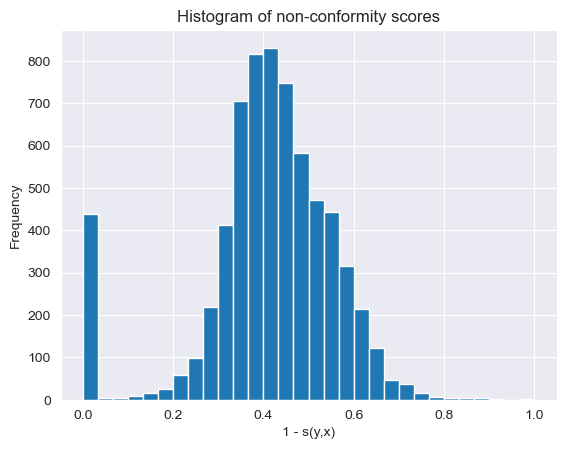

In [238]:
plt.hist(scores.detach().numpy(), bins=30, range=(0, 1))
plt.xlabel("1 - s(y,x)")
plt.ylabel("Frequency")
plt.title("Histogram of non-conformity scores")
plt.show()


In [239]:
prediction_sets = []

# Iterating through the probabilities tensor
for prob in test_preds_sl:
    prediction_set = []
    if prob < qhat:
        prediction_set.append("Charged Off")
    if 1 - prob < qhat:
        prediction_set.append("Fully Paid")
    prediction_sets.append(prediction_set)

print(prediction_sets)

[['Charged Off', 'Fully Paid'], ['Charged Off'], ['Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['

In [240]:
# Initialize counters for sets of length 1 and length 2
count_length_1 = 0
count_length_2 = 0

# Iterate through the prediction_sets list
for prediction_set in prediction_sets:
    if len(prediction_set) == 1:
        count_length_1 += 1
    elif len(prediction_set) == 2:
        count_length_2 += 1

print("Number of prediction sets of length 1:", count_length_1)
print("Number of prediction sets of length 2:", count_length_2)


Number of prediction sets of length 1: 2697
Number of prediction sets of length 2: 3961


In [245]:
(credit_score>3300.5).sum()

tensor(2957)